In [1]:
from torch import nn,optim,cuda,from_numpy
from torch.utils import data
from torchvision import datasets,transforms
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
device = ('cuda:0' if cuda.is_available() else 'cpu')
print(device)

cuda:0


In [4]:
train_dataset = datasets.MNIST(root='/mnist_data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset =  datasets.MNIST(root='/mnist_data/',
                               train=False,
                               transform=transforms.ToTensor())
train_data = data.DataLoader(train_dataset,batch_size=64,shuffle=True)
test_data = data.DataLoader(test_dataset,batch_size=64,shuffle=False)
device = 'cuda'
class Madel(nn.Module):
  def __init__(self) -> None:
    super(Madel,self).__init__()
    self.conv1 = nn.Conv2d(1,10,5)
    self.conv2 = nn.Conv2d(10,20,5)
    self.pool = nn.MaxPool2d(2)
    self.fc = nn.Linear(20*4*4,10)
  def forward(self,x):
    x = F.relu(self.pool(self.conv1(x)))
    x = F.relu(self.pool(self.conv2(x)))
    x = x.view(-1,320)
    x = self.fc(x)
    return  F.log_softmax(x)

model = Madel()
model.to(device)

creterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

def train(epoch):
  for b_i,data1 in enumerate(train_data):
    data1,label = data1[0].to(device),data1[1].to(device)
    optimizer.zero_grad()
    bash = model.forward(data1)
    loss = creterian(bash,label)
    loss.backward()
    optimizer.step()

    if b_i%100 == 0:
      print(f"Epoch = {epoch} | Batch = {b_i} | {b_i*len(data1)}/{len(train_data.dataset)} | Loss = {loss.item()} | ")

def test():
  Xato = 0 ; Togri = 0
  for rasm, label in test_data:
    rasm,label = rasm.to(device),label.to(device)
    bashorat = model(rasm)
    Xato += creterian(bashorat,label).item()
    natija = bashorat.data.max(1)[1]
    Togri +=natija.eq(label.data.view_as(natija)).cuda().sum()
  print(f"Aniqlik = {Togri/len(test_data.dataset)} | Foizda {100.0*Togri/len(test_data.dataset)}%")
for epoch in range(11):
  train(epoch)
  test()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_13664\1399633187.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return  F.log_softmax(x)


Epoch = 0 | Batch = 0 | 0/60000 | Loss = 2.306569814682007 | 
Epoch = 0 | Batch = 100 | 6400/60000 | Loss = 0.27314871549606323 | 
Epoch = 0 | Batch = 200 | 12800/60000 | Loss = 0.3136037290096283 | 
Epoch = 0 | Batch = 300 | 19200/60000 | Loss = 0.3299945294857025 | 
Epoch = 0 | Batch = 400 | 25600/60000 | Loss = 0.21242989599704742 | 
Epoch = 0 | Batch = 500 | 32000/60000 | Loss = 0.1241166815161705 | 
Epoch = 0 | Batch = 600 | 38400/60000 | Loss = 0.03584809601306915 | 
Epoch = 0 | Batch = 700 | 44800/60000 | Loss = 0.04095550626516342 | 
Epoch = 0 | Batch = 800 | 51200/60000 | Loss = 0.17625032365322113 | 
Epoch = 0 | Batch = 900 | 57600/60000 | Loss = 0.08398830145597458 | 
Aniqlik = 0.972000002861023 | Foizda 97.19999694824219%
Epoch = 1 | Batch = 0 | 0/60000 | Loss = 0.2106156349182129 | 
Epoch = 1 | Batch = 100 | 6400/60000 | Loss = 0.025193586945533752 | 
Epoch = 1 | Batch = 200 | 12800/60000 | Loss = 0.11061839014291763 | 
Epoch = 1 | Batch = 300 | 19200/60000 | Loss = 0.0852

tensor(9, device='cuda:0')
tensor([[-2.3354e+01, -1.7629e+01, -2.2325e+01, -1.9998e+01, -5.9605e-07,
         -2.3281e+01, -1.9199e+01, -1.7846e+01, -1.9426e+01, -1.4406e+01]],
       device='cuda:0', grad_fn=<LogSoftmaxBackward0>)


C:\Users\Lucas\AppData\Local\Temp\ipykernel_13664\1399633187.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return  F.log_softmax(x)


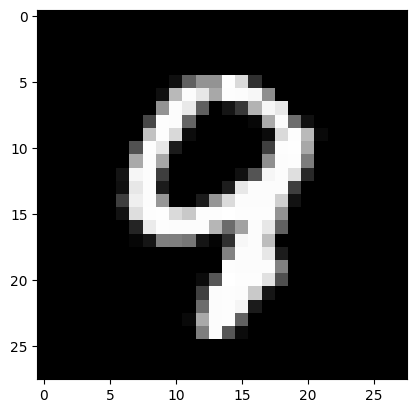

In [6]:
print(model(test_dataset[501][0].cuda()).argmax())
print(model(test_dataset[555][0].cuda()))
plt.imshow(np.squeeze(test_dataset[5015][0]),cmap='gray')
plt.show()

tensor(7, device='cuda:0')


C:\Users\Lucas\AppData\Local\Temp\ipykernel_13664\1399633187.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return  F.log_softmax(x)


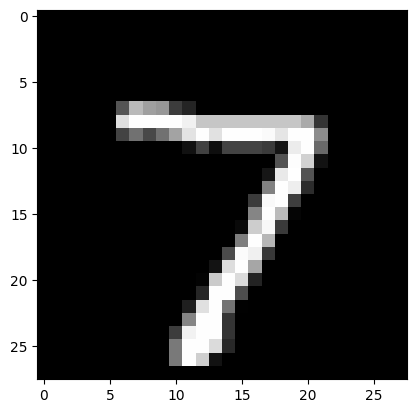

In [11]:
print(model(test_dataset[0][0].cuda()).argmax())
model(test_dataset[0][0].cuda())
plt.imshow(np.squeeze(test_dataset[0][0]),cmap='gray')